NAME : RAJ KUMAR

STUDENT ID : 0850979



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Load the data
file_path = '/content/610158698-Risk-and-Return-Daily-Dataset.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to understand the structure
df.head()


,Accord Code ===>,218474,Unnamed: 2,100010,Unnamed: 4,100034,Unnamed: 6,100112,Unnamed: 8,100114,...,132555,Unnamed: 54,132755,Unnamed: 56,132898,Unnamed: 58,200132,Unnamed: 60,205198,Unnamed: 62
0,Name of Company ===>,S&P Bse Sensex,NaN,HDFC Ltd.,NaN,Bajaj Finance Ltd.,NaN,State Bank Of India,NaN,Titan Company Ltd.,...,NTPC Ltd.,NaN,Tech Mahindra Ltd.,NaN,Power Grid Corporation Of India Ltd.,NaN,Bajaj Auto Ltd.,NaN,Bajaj Finserv Ltd.,NaN
1,Date,Close Price,Market Cap,Close Price,Market Cap,Close Price,Market Cap,Close Price,Market Cap,Close Price,...,Close Price,Market Cap,Close Price,Market Cap,Close Price,Market Cap,Close Price,Market Cap,Close Price,Market Cap
2,2010-01-04 00:00:00,17558.73,2699135.957679,534.54,76400.537211,33.180509,1249.938976,229.16,145489.151674,71.0375,...,193.166667,191129.864792,255.9,12511.964262,112.35,47286.331219,866.2,25064.971272,353.19585,5200.648767
3,2010-01-05 00:00:00,17686.24,2715674.675911,536.32,76654.948399,33.000788,1243.168702,229.19,145508.19808,72.5275,...,191.083333,189068.498692,259.1375,12670.258456,112.55,47370.508044,868.25,25124.291511,353.58889,5206.436107
4,2010-01-06 00:00:00,17701.13,2717177.479666,538.12,76912.218139,33.151365,1248.841093,230.505,146343.065572,73.71,...,190.291667,188285.179574,260.175,12720.985939,113.4,47728.259548,856.525,24785.008681,344.548963,5073.327278


In [ ]:
df = pd.read_excel(file_path, skiprows=2)  # Skipping initial rows to align with actual data

# Rename columns to avoid duplicate or ambiguous names
df.columns = [f"{col}_{i}" if 'Unnamed' in col else col for i, col in enumerate(df.columns)]
df.rename(columns={'Date_0': 'Date'}, inplace=True)

# Convert 'Date' column to datetime format for time-series analysis
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index to simplify plotting and time-based operations
df.set_index('Date', inplace=True)

# Check for and handle missing values
# Drop rows with any missing values
df_cleaned = df.dropna()

# Display summary to confirm changes
print("Missing values per column after cleaning:")
print(df_cleaned.isnull().sum())
print("\nData sample after cleaning:")
print(df_cleaned.head())


Missing values per column after cleaning:
Close Price       0
Market Cap        0
Close Price.1     0
Market Cap.1      0
Close Price.2     0
                 ..
Market Cap.28     0
Close Price.29    0
Market Cap.29     0
Close Price.30    0
Market Cap.30     0
Length: 62, dtype: int64

Data sample after cleaning:
            Close Price    Market Cap  Close Price.1  Market Cap.1  \
Date                                                                 
2010-01-04     17558.73  2.699136e+06         534.54  76400.537211   
2010-01-05     17686.24  2.715675e+06         536.32  76654.948399   
2010-01-06     17701.13  2.717177e+06         538.12  76912.218139   
2010-01-07     17615.72  2.707313e+06         529.07  75618.723056   
2010-01-08     17540.29  2.697950e+06         520.07  74332.374354   

            Close Price.2  Market Cap.2  Close Price.3   Market Cap.3  \
Date                                                                    
2010-01-04      33.180509   1249.938976        

In [ ]:
# Load the cleaned data (assuming you've saved it as `df_cleaned`)
df = pd.read_excel(file_path, skiprows=2)
df.columns = [f"{col}_{i}" if 'Unnamed' in col else col for i, col in enumerate(df.columns)]
df.rename(columns={'Date_0': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df_cleaned = df.dropna()  # Further cleaning steps applied here as needed

In [ ]:
# 1. Descriptive Statistics
print("Descriptive statistics for selected columns:")
print(df_cleaned.describe())

Descriptive statistics for selected columns:
        Close Price    Market Cap  Close Price.1   Market Cap.1  \
count   2644.000000  2.644000e+03    2644.000000    2644.000000   
mean   26241.976611  4.523301e+06    1224.669368  197761.074734   
std     7546.434254  1.508661e+06     529.460492   95759.800876   
min    15175.080000  2.439929e+06     461.670000   66053.187333   
25%    19005.152500  3.107634e+06     727.762500  108891.157483   
50%    26216.175000  4.416647e+06    1159.600000  183021.933255   
75%    32577.465000  5.872593e+06    1725.400000  280433.383508   
max    41952.630000  7.776191e+06    2492.700000  430994.726304   

       Close Price.2   Market Cap.2  Close Price.3   Market Cap.3  \
count    2644.000000    2644.000000    2644.000000    2644.000000   
mean     1029.942433   58759.512873     246.115061  188789.085838   
std      1218.986991   72420.192609      48.462080   53010.832746   
min        27.754857    1045.549891     147.340000  100507.735897   
25%   

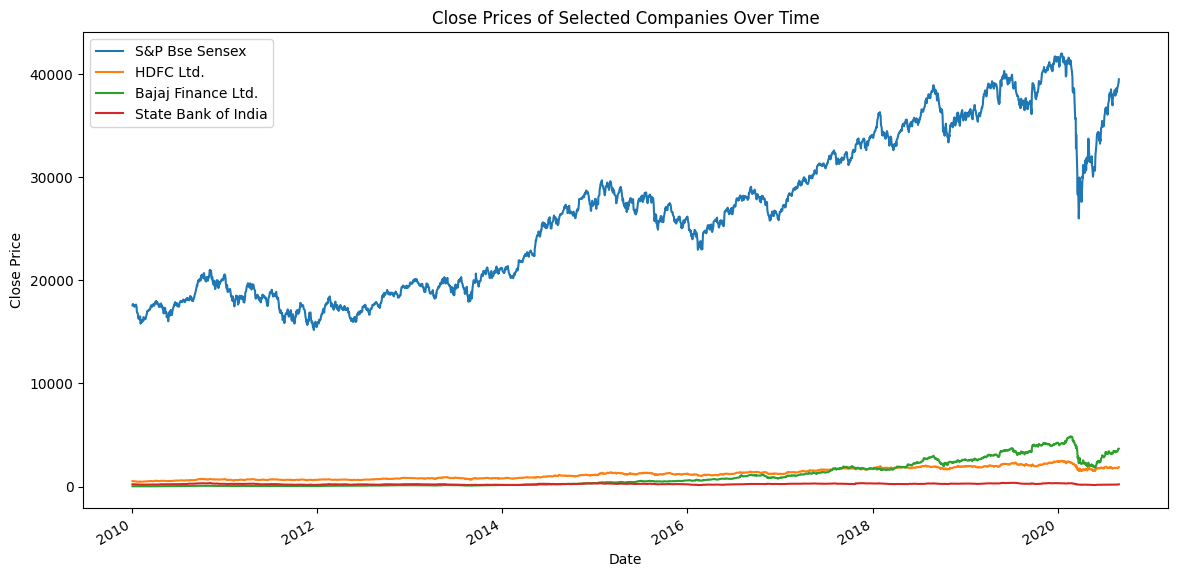

In [ ]:
# 2. Plotting Close Prices over Time for Selected Companies
company_columns = ['Close Price', 'Close Price.1', 'Close Price.2', 'Close Price.3']
df_cleaned[company_columns].plot(figsize=(14, 7), title="Close Prices of Selected Companies Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(labels=["S&P Bse Sensex", "HDFC Ltd.", "Bajaj Finance Ltd.", "State Bank of India"])
plt.show()

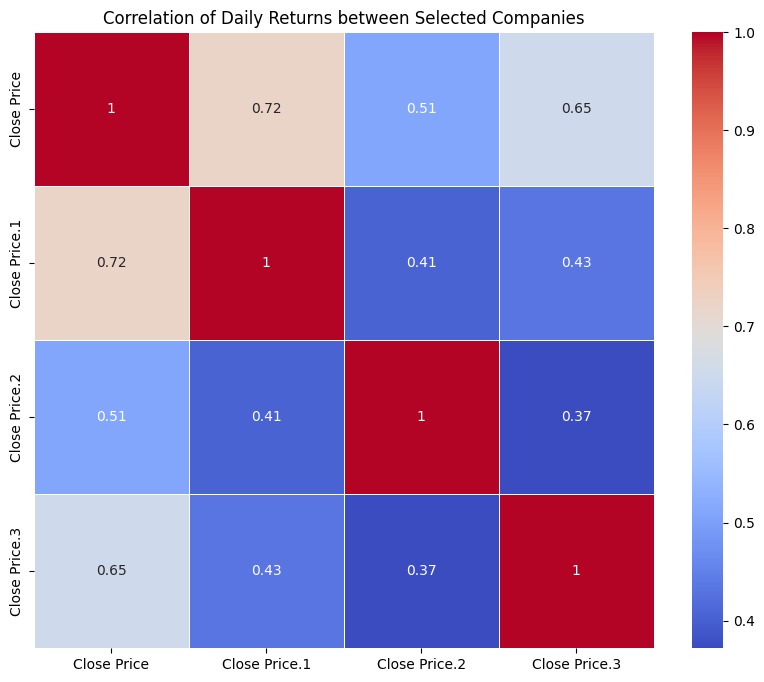

In [ ]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[company_columns].pct_change().corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Daily Returns between Selected Companies")
plt.show()

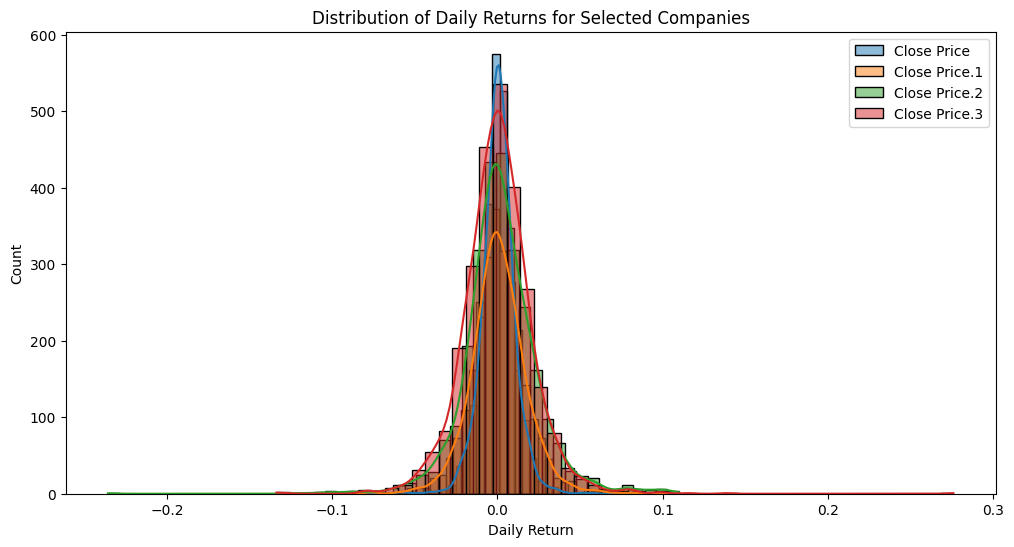

In [ ]:
# 4. Distribution of Daily Returns for Each Company
plt.figure(figsize=(12, 6))
for col in company_columns:
    daily_returns = df_cleaned[col].pct_change().dropna()
    sns.histplot(daily_returns, kde=True, label=col, bins=50, alpha=0.5)

plt.title("Distribution of Daily Returns for Selected Companies")
plt.xlabel("Daily Return")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Assuming df_cleaned has the cleaned and organized data with date index set
# Automatically identify all columns with "Close Price" in the name
company_columns = [col for col in df_cleaned.columns if 'Close Price' in col]

# 1. Calculate Daily Returns
daily_returns = df_cleaned[company_columns].pct_change().dropna()

# 2. Define a function to calculate mean return and volatility
def risk_return_analysis(returns):
    avg_return = returns.mean()
    volatility = returns.std()
    return avg_return, volatility

# 3. Apply the function to daily, weekly, monthly, and annual resampling
periods = {
    'Daily': daily_returns,
    'Weekly': daily_returns.resample('W').agg(lambda x: (1 + x).prod() - 1),
    'Monthly': daily_returns.resample('M').agg(lambda x: (1 + x).prod() - 1),
    'Annually': daily_returns.resample('A').agg(lambda x: (1 + x).prod() - 1)
}

# 4. Calculate risk and return for each period and company
for period_name, returns_data in periods.items():
    print(f"\n--- {period_name} Risk and Return Analysis ---")

    for company in company_columns:
        company_returns = returns_data[company]
        avg_return, volatility = risk_return_analysis(company_returns)

        # Print results for each company
        print(f"\nCompany: {company}")
        print("Average Return (Annualized):")
        print((1 + avg_return) ** (252 if period_name == 'Daily' else 1) - 1)  # Annualize daily returns
        print("\nVolatility (Risk):")
        print(volatility * np.sqrt(252 if period_name == 'Daily' else 1))  # Annualize daily volatility


<ipython-input-29-8d3c1bdf46b0>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Monthly': daily_returns.resample('M').agg(lambda x: (1 + x).prod() - 1),
<ipython-input-29-8d3c1bdf46b0>:22: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  'Annually': daily_returns.resample('A').agg(lambda x: (1 + x).prod() - 1)



--- Daily Risk and Return Analysis ---

Company: Close Price
Average Return (Annualized):
0.09678795753519309

Volatility (Risk):
0.17366558507088914

Company: Close Price.1
Average Return (Annualized):
0.1728041087894996

Volatility (Risk):
0.280491081162149

Company: Close Price.2
Average Return (Annualized):
0.6765370990187145

Volatility (Risk):
0.36853488702834486

Company: Close Price.3
Average Return (Annualized):
0.05773297013995582

Volatility (Risk):
0.34220841350719267

Company: Close Price.4
Average Return (Annualized):
0.38034366871480674

Volatility (Risk):
0.34224623826896033

Company: Close Price.5
Average Return (Annualized):
0.22845462046520093

Volatility (Risk):
0.23131502064176437

Company: Close Price.6
Average Return (Annualized):
0.15020672861366724

Volatility (Risk):
0.2803798312444267

Company: Close Price.7
Average Return (Annualized):
0.25642467469340846

Volatility (Risk):
0.2851856573331518

Company: Close Price.8
Average Return (Annualized):
-0.03560895

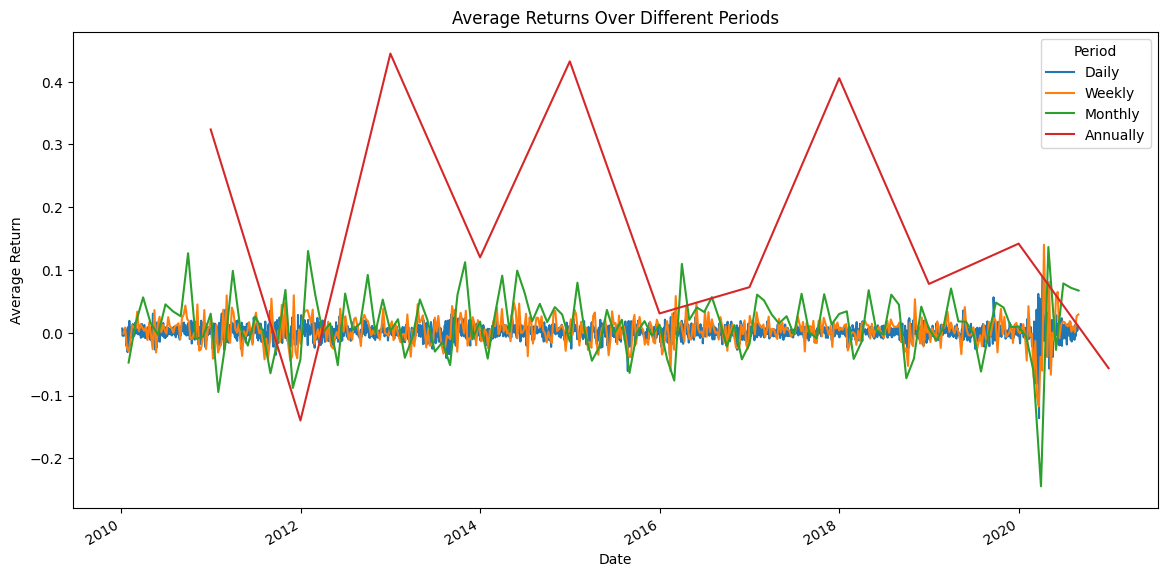

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_cleaned and periods are already defined

# 1. Time Series of Average Returns for Each Period and Each Company
plt.figure(figsize=(14, 7))

# Iterate through periods and plot average returns for all companies
for period_name, returns_data in periods.items():
    # Calculate mean return for each company over the time period
    avg_returns_per_period = returns_data.mean(axis=1)

    # Plot the average return for the period across all companies
    avg_returns_per_period.plot(label=period_name)

plt.title("Average Returns Over Different Periods")
plt.xlabel("Date")
plt.ylabel("Average Return")
plt.legend(title="Period")
plt.show()


**Time Series Plot of Average Returns Over Different Periods**

1.   Purpose: This plot helps you observe how average returns change over time across different periods (daily, weekly, monthly, annually).
2.   Insight: By comparing the trends in returns over these intervals, you can assess consistency in returns over shorter versus longer time frames. This is useful to identify patterns or anomalies, such as periods of high volatility or trends in market cycles.
3. Application: Observing daily returns may highlight short-term fluctuations and market noise, while monthly or annual returns can reveal longer-term trends, helping investors decide which time frame aligns with their risk tolerance and investment goals.


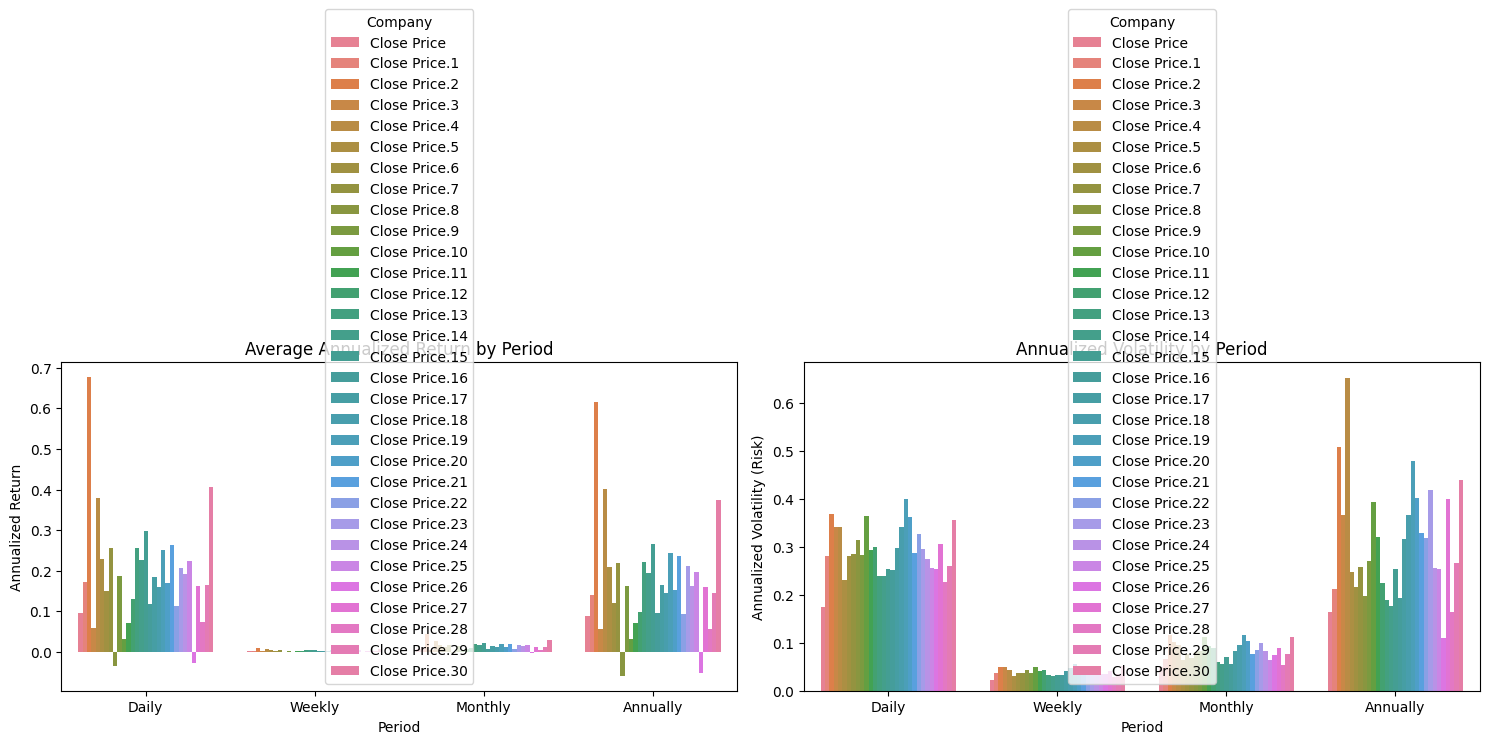

In [ ]:
# Assuming df_cleaned and periods are already defined and risk_return_analysis is applied

# Create a dictionary to hold the results for each company and period
results = []

# Calculate risk and return for each company and period
for period_name, returns_data in periods.items():
    for company in company_columns:
        company_returns = returns_data[company]
        avg_return, volatility = risk_return_analysis(company_returns)

        # Annualize the return and volatility based on the period
        annualized_return = (1 + avg_return) ** (252 if period_name == 'Daily' else 1) - 1
        annualized_volatility = volatility * np.sqrt(252 if period_name == 'Daily' else 1)

        # Append results
        results.append({
            'Company': company,
            'Period': period_name,
            'Return': annualized_return,
            'Volatility': annualized_volatility
        })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Visualization: Bar Plot for Average Return and Volatility by Period and Company
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Average Annualized Returns
sns.barplot(data=results_df, x="Period", y="Return", hue="Company", ax=axes[0])
axes[0].set_title("Average Annualized Return by Period")
axes[0].set_ylabel("Annualized Return")

# Plot Annualized Volatility (Risk)
sns.barplot(data=results_df, x="Period", y="Volatility", hue="Company", ax=axes[1])
axes[1].set_title("Annualized Volatility by Period")
axes[1].set_ylabel("Annualized Volatility (Risk)")

plt.tight_layout()
plt.show()


**Bar Plot of Average Annualized Return and Volatility by Period**
1. Purpose: This visualization directly compares the annualized average return and annualized volatility (risk) across companies and periods, making it easy to see how each company's performance varies by time frame.
2. Return Comparison: By looking at the returns bar chart, you can quickly identify which period (e.g., daily, weekly, monthly, annual) tends to deliver the highest average return across different companies. For instance, you may find that longer-term periods generally yield higher returns due to compounding effects, which can be important for investors aiming for growth.
3. Risk Comparison: The volatility bar chart reveals how risk fluctuates across periods and companies. Typically, longer periods (like annual) might show lower volatility as they average out daily or weekly fluctuations, while shorter periods (daily, weekly) show higher risk levels.
4. Application: This helps in choosing time frames that provide an optimal return for a given level of risk, aiding in decisions such as choosing between short-term and long-term investments.

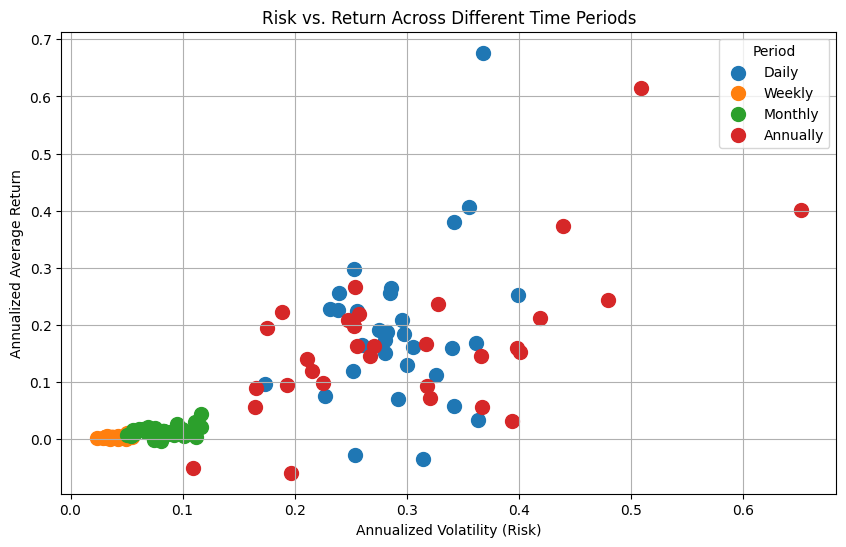

In [ ]:
# Assuming results_df is already defined (with columns: Company, Period, Return, Volatility)

# 3. Risk-Return Scatter Plot for all companies and periods
plt.figure(figsize=(10, 6))

# Loop through unique periods and plot the data
for period_name in results_df['Period'].unique():
    period_data = results_df[results_df['Period'] == period_name]

    # Scatter plot for each period
    plt.scatter(period_data['Volatility'], period_data['Return'], label=period_name, s=100)

plt.title("Risk vs. Return Across Different Time Periods")
plt.xlabel("Annualized Volatility (Risk)")
plt.ylabel("Annualized Average Return")
plt.legend(title="Period")
plt.grid(True)
plt.show()


**Risk-Return Scatter Plot Across Different Time Periods**
1. Purpose: The scatter plot visually represents the risk-return trade-off for each period, allowing you to see how each period's return corresponds to its associated risk.
2. Insight:Each point in the plot represents a period (e.g., daily, weekly) and plots its annualized return against its annualized volatility. By comparing these points, you can observe whether a higher return comes with higher risk (a common expectation in financial markets).
For example, shorter periods (like daily) often exhibit higher volatility, but they may also offer the potential for high returns. Conversely, longer periods (like monthly or annual) tend to show more stable returns with relatively lower volatility.
3. Application: This plot is particularly useful for identifying the efficient frontier for investment periods: periods that offer the best return for the least amount of risk. Investors or analysts can use this insight to select a period that aligns with their risk tolerance and return expectations, optimizing their investment strategy.